### Try It: Comparing Feature Selection Methods

In this module, you have seen two ways to select features.  The first approach is using sequential feature selection to sequentially add or delete features and only use those that improve the model.  The second approach is using a regularized model to identify features based on non-zero coefficients.  This activity focuses on comparing variations of both these methods.  

You will use both the `SequentialFeatureSelection` and `RFE` (recursive feature elimination) to build and compare regression models.  Consider the following 6 feature selection methods -- leave all other arguments to default besides the `estimator` and `n_features_to_select` arguments:

- `Ridge` regressor to extract coefficients
- `SequentialFeatureSelection` using the `Lasso` to select 4 features.
- `RFE` using `Lasso` to select 4 features.

For each of these, fit the training data `X_train`, `y_train` below.  Compare the magnitude of the results of your `Ridge` model to those that result from feature selection methods.  

#### The Data

For this problem a dataset with information on red wine chemical compositions and their quality is given.  Your goal is to use the properties of the wine to predict the quality.  Below, the data is loaded and train/test splits constructed.

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import plotly.express as px
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector, RFE, SelectFromModel
from sklearn.metrics import accuracy_score

In [51]:
df = pd.read_csv('data/winequality-red.csv')

In [52]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [54]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [55]:
df.columns = df.columns.str.replace(' ', '_')

<AxesSubplot:>

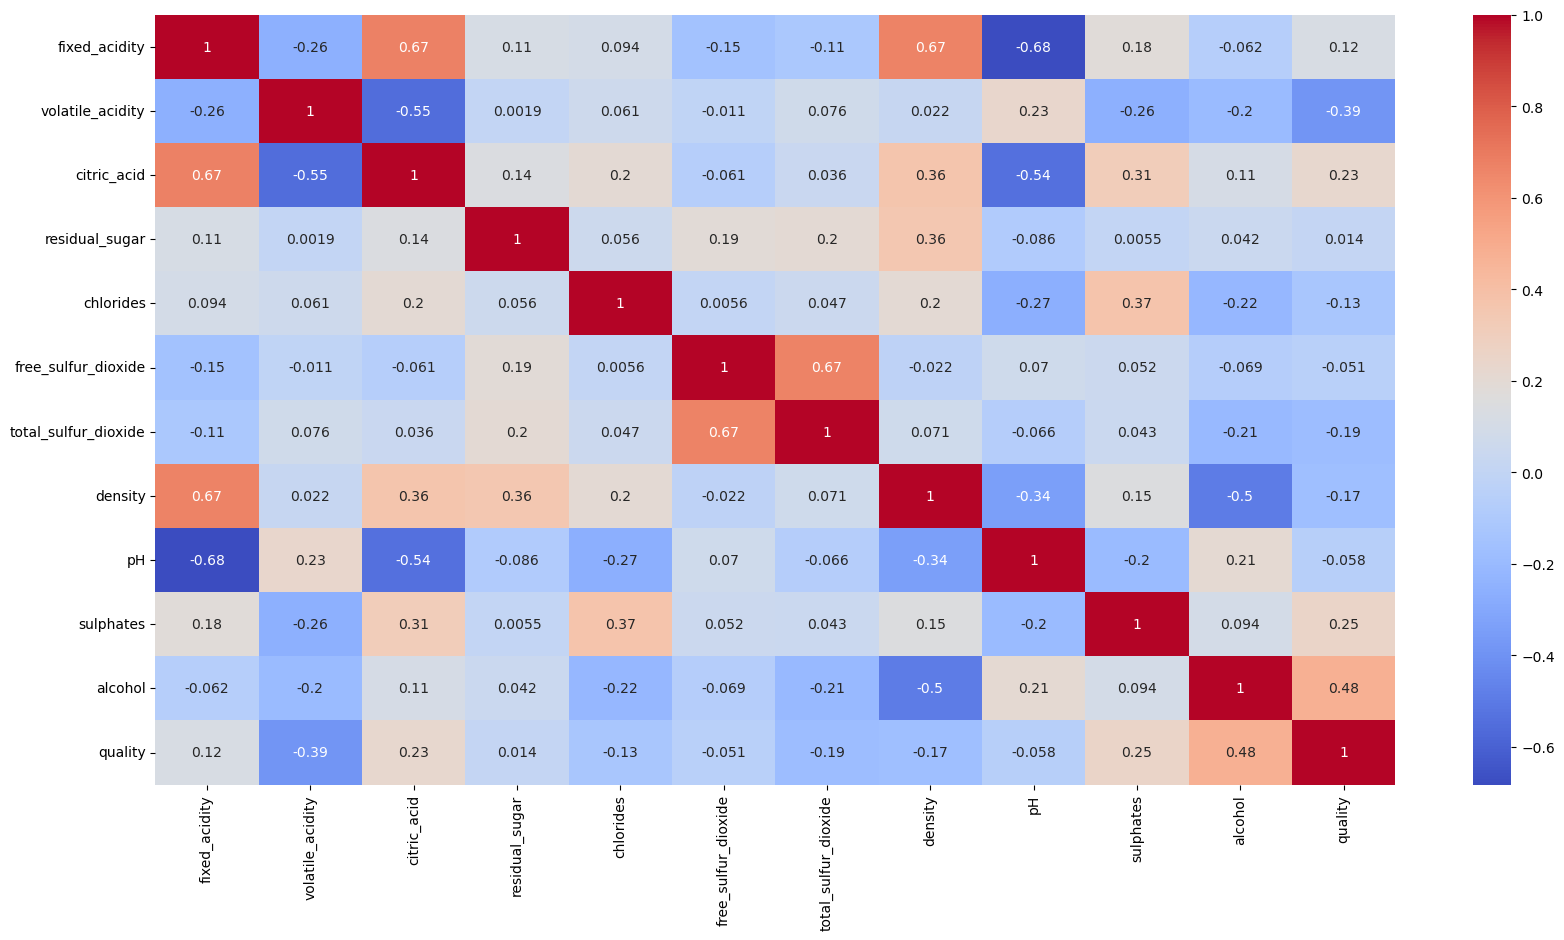

In [56]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [57]:
#X = df.drop('quality', axis = 1)[['alcohol','sulphates','citric acid','fixed acidity']]
X = df.drop('quality', axis = 1)
y = df['quality']

<AxesSubplot:>

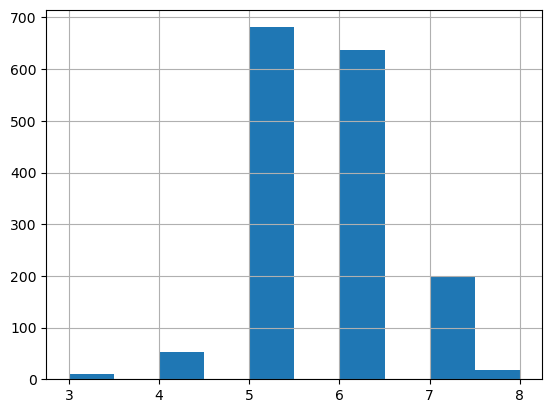

In [58]:
y.hist()

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1199, 11), (400, 11), (1199,), (400,))

### Polynomial Degree - Calculate model complexity that had the smallest MSE ( on training )

In [60]:
train_mses = []

for i in range(1, 4):
    pipe = Pipeline([('poly_features', PolynomialFeatures(degree = i, include_bias = False)), 
                     ('lr_model', LinearRegression())])
    pipe.fit(X_train, y_train)
    train_preds = pipe.predict(X_train)
    train_mse = mean_squared_error(y_train, train_preds)
    train_mses.append(train_mse)
    
best_complexity = train_mses.index(min(train_mses)) + 1
print(train_mses)
print("Best Model Complexity ==> ", best_complexity)

[0.42741864865173085, 0.3717640979914507, 0.23046455550801334]
Best Model Complexity ==>  3


### Ridge regressor to extract coefficients

In [79]:
train_preds = ''
test_preds = ''
train_mse = ''
test_mse = ''
best_alpha = ''

ridge_pipe = Pipeline([('scaler', StandardScaler()),('ridge', Ridge())])
param_dict = {'ridge__alpha': [0.001, 0.01, 0.1]}
ridge_grid = GridSearchCV(ridge_pipe, param_grid=param_dict)
ridge_grid.fit(X_train, y_train)
train_preds = ridge_grid.predict(X_train)
test_preds = ridge_grid.predict(X_test)
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

best_alpha = ridge_grid.best_params_

print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print(f'Best alpha: {list(best_alpha.values())[0]}')

Train MSE: 0.42741865063937484
Test MSE: 0.3883026574276673
Best alpha: 0.1


In [69]:
ridge_grid

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [0.001, 0.1, 1.0]})

### SequentialFeatureSelection using the Lasso to select 4 features

In [82]:
sfs_pipe = ''
sequential_train_mse = ''
sequential_test_mse = ''

sfs_pipe = Pipeline([('poly_features', PolynomialFeatures(degree = 3, include_bias = False)),
            http://localhost:8888/notebooks/Desktop/BH-PCMLAI/Module9/try-it_9.1_starter/try_it_9.1-starter-va.ipynb#         ('selector', SequentialFeatureSelector(LinearRegression(),
                                                            n_features_to_select=4)),
                     ('linreg', LinearRegression())])

sfs_pipe.fit(X_train, y_train)
sequential_train_mse = mean_squared_error(y_train, sfs_pipe.predict(X_train))
sequential_test_mse = mean_squared_error(y_test, sfs_pipe.predict(X_test))

print("SFS Train MSE =>",sequential_train_mse)
print("SFS Test MSE =>",sequential_test_mse)
sfs_pipe

SFS Train MSE => 0.42649362770899935
SFS Test MSE => 0.38402535427113876


Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=4)),
                ('linreg', LinearRegression())])

In [84]:
selector_train_mse = ''
selector_test_mse = ''

model_selector_pipe = Pipeline([('poly_features', PolynomialFeatures(degree=3, include_bias=False)),
                                ('scaler', StandardScaler()),
                                ('selector', SelectFromModel(Lasso(alpha=0.1))),
                                ('linreg', LinearRegression())])

model_selector_pipe.fit(X_train, y_train)
selector_train_mse = mean_squared_error(y_train, model_selector_pipe.predict(X_train))
selector_test_mse = mean_squared_error(y_test, model_selector_pipe.predict(X_test))

print(selector_train_mse)
print(selector_test_mse)

0.42768629581126594
0.3807211938208953


### RFE using Lasso to select 4 features.

In [95]:
lasso_pipe = ''
lasso_coefs = ''
lasso_train_mse = ''
lasso_test_mse = ''

lasso_pipe = Pipeline([('poly3_features', PolynomialFeatures(degree = 3, include_bias = False)),
                       ('scaler', StandardScaler()),
                       ('lasso', Lasso(alpha=0.1))])
lasso_pipe.fit(X_train, y_train)
lasso_coefs = lasso_pipe.named_steps['lasso'].coef_

lasso_train_mse = mean_squared_error(y_train, lasso_pipe.predict(X_train))
lasso_test_mse = mean_squared_error(y_test, lasso_pipe.predict(X_test))

print(lasso_train_mse)
print(lasso_test_mse)

0.45318917539355763
0.4142678132214248


In [86]:
feature_names = ''
lasso_df = ''

feature_names = lasso_pipe.named_steps['poly3_features'].get_feature_names_out()
lasso_df = pd.DataFrame({'feature': feature_names, 'coef': lasso_coefs})

print(type(feature_names))
lasso_df.loc[lasso_df['coef'] != 0]

<class 'numpy.ndarray'>


,feature,coef
70,density alcohol,0.060362
142,fixed_acidity alcohol^2,0.004992
146,volatile_acidity^2 chlorides,-0.010994
188,volatile_acidity density^2,-0.101292
189,volatile_acidity density pH,-0.012847
294,chlorides total_sulfur_dioxide pH,-0.025691
346,density^2 alcohol,0.103573
361,sulphates alcohol^2,0.137176


In [97]:
rfe = RFE(estimator=Lasso(alpha=0.1), n_features_to_select=4, verbose=1)
rfe.fit(X_train, y_train)

rfe_train_mse = mean_squared_error(y_train, rfe.predict(X_train))

# Print the features that are not eliminated
print('Features that are not eliminated => ', X.columns[rfe.support_])
print("MSE for RFE with LASSO using 4 features => ",rfe_train_mse)

Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Features that are not eliminated =>  Index(['fixed_acidity', 'free_sulfur_dioxide', 'total_sulfur_dioxide',
       'alcohol'],
      dtype='object')
MSE for RFE with LASSO using 4 features =>  0.49965149100421685
